In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Funcion crea  serie de tiempo

In [3]:
def SerieDeTiempo(Lugar):
    df=pd.read_excel("UnionDatos.xlsx", sheet_name=Lugar)
    filtro =df[df["Time"].str.contains("24:", case=False )]
    for i in filtro.index:
        a=filtro["Time"].loc[i]
        if a[6:10]=="2016" and a[3:5]=="02" and a[0:2]=="29":
            df["Time"].loc[i]="01-03-2016 00:00" 
        elif a[6:10]=="2020" and a[3:5]=="02" and a[0:2]=="29":
            df["Time"].loc[i]="01-03-2020 00:00"
        elif (a[3:5]=="01" or a[3:5]=="03" or a[3:5]=="05" or a[3:5]=="07" or a[3:5]=="08" or a[3:5]=="10") and (a[0:2]=="31"):
            mes=int(a[3:5])+1
            mesc=str(mes)
            if len(mesc)==1:
                mesc="0"+mesc
            df["Time"].loc[i]="01"+"-"+mesc+"-"+a[6:10]+ " 00:00"
        elif a[3:5]=="12" and a[0:2]=="31":
            ano=int(a[6:10])+1
            ano=str(ano)
            df["Time"].loc[i]="01"+"-"+"01"+"-"+ano+ " 00:00"
        elif (a[3:5]=="02" and a[0:2]=="28")or ((a[3:5]=="04" or a[3:5]=="06" or a[3:5]=="09" or a[3:5]=="10" or a[3:5]=="11") and (a[0:2]=="30")):
            mes=int(a[3:5])+1
            mesc=str(mes)
            if len(mesc)==1:
                mesc="0"+mesc
            df["Time"].loc[i]="01"+"-"+mesc+"-"+a[6:10]+ " 00:00"
        else:
            dia=int(a[0:2])+1
            dia=str(dia)
            if len(dia)==1:
                dia="0"+dia
            df["Time"].loc[i]=dia+"-"+a[3:5]+"-"+a[6:10]+ " 00:00"
    for i in df.index:
        a=df["Time"].loc[i]
        df["Time"].loc[i]=a[3:5]+"-"+a[0:2]+"-"+a[6:10]+ a[10:]
    df.index=pd.to_datetime(df["Time"])
    df = df.drop(columns=["Time"])
    df =df.replace("----",np.nan)
    df = df.apply(pd.to_numeric)
    return df

## Tunal

In [51]:
Tunal=SerieDeTiempo("Tunal")

In [52]:
TUNALAÑO2019DIA1=Tunal.loc['2019-01-01 00:00:00':'2019-02-01 00:00:00']

<AxesSubplot:title={'center':'Concentración de PM10 y P.25 en Suba- Mes Enero de 2019'}, xlabel='Time'>

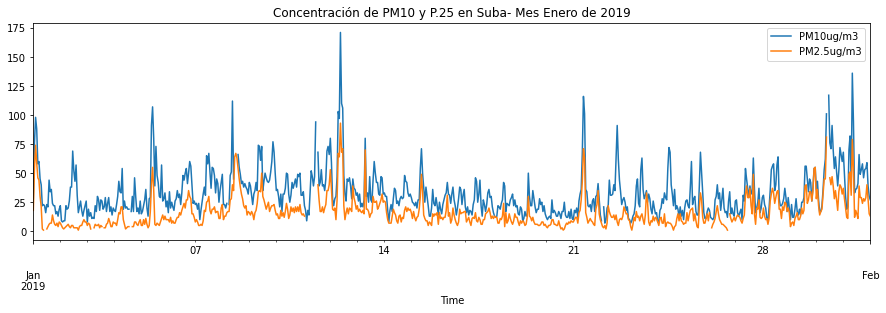

In [53]:
TUNALAÑO2019DIA1.plot(title="Concentración de PM10 y P.25 en Suba- Mes Enero de 2019",figsize=(15,4))

In [54]:
TUNALAÑO2019DIA1.mean()

PM10ug/m3     32.789688
PM2.5ug/m3    16.388658
dtype: float64

In [55]:
PM10MAYOR50= TUNALAÑO2019DIA1[TUNALAÑO2019DIA1["PM10ug/m3"] > 50]
PM10MAYOR50=PM10MAYOR50["PM10ug/m3"]

In [61]:
PM25MAYOR50= TUNALAÑO2019DIA1[TUNALAÑO2019DIA1["PM2.5ug/m3"] > 50]
PM25MAYOR50=PM25MAYOR50["PM2.5ug/m3"]

In [62]:
print(len(PM10MAYOR50),len(PM25MAYOR50))

104 23


In [57]:
TUNALDROPNULL=TUNALAÑO2019DIA1["PM2.5ug/m3"].dropna()

In [58]:
(len(PM10MAYOR50)/len(TUNALDROPNULL))*100

14.384508990318118

In [59]:
TUNALDROPNULL2=TUNALAÑO2019DIA1["PM10ug/m3"].dropna()

In [60]:
(len(PM25MAYOR50)/len(TUNALDROPNULL2))*100

3.1207598371777476

In [ ]:
for i in PM10MAYOR50.index:

## Suba

In [7]:
Suba=SerieDeTiempo("Suba")

In [30]:
SUBAAÑO2019DIA1=Suba.loc['2019-01-01 00:00:00':'2019-02-01 00:00:00']

<AxesSubplot:title={'center':'Concentración de PM10 y P.25 en Suba- Mes Enero de 2019'}, xlabel='Time'>

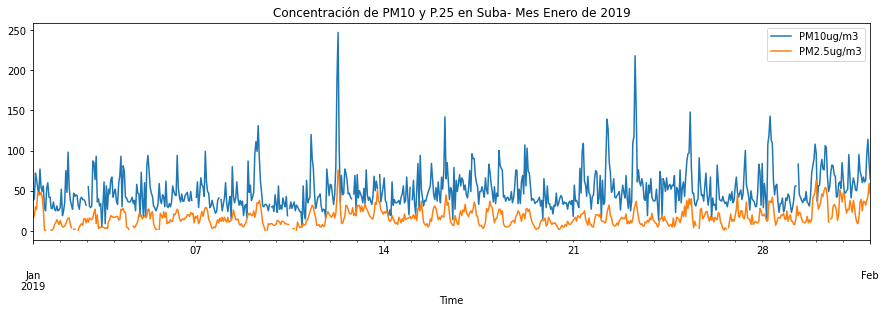

In [31]:
SUBAAÑO2019DIA1.plot(title="Concentración de PM10 y P.25 en Suba- Mes Enero de 2019",figsize=(15,4))

# Puente Aranda

In [10]:
PuenteAranda=SerieDeTiempo("PuenteAranda")

In [27]:
PUENTEARANDAAÑO2019DIA1=PuenteAranda.loc['2019-01-01 00:00:00':'2019-02-01 00:00:00']

<AxesSubplot:title={'center':'Concentración de PM10 y P.25 en Puente Aranda- Mes Enero de 2019'}, xlabel='Time'>

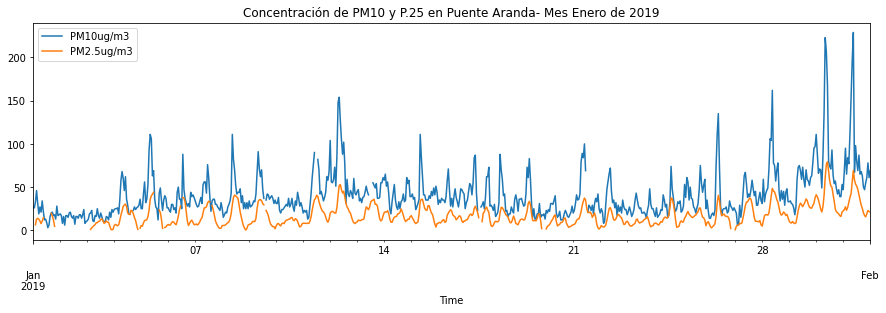

In [28]:
PUENTEARANDAAÑO2019DIA1.plot(title="Concentración de PM10 y P.25 en Puente Aranda- Mes Enero de 2019",figsize=(15,4))

# San Cristobal 

In [12]:
SanCristobal=SerieDeTiempo("SanCristobal")

In [24]:
SANCRISTOBALAÑO2019DIA1=SanCristobal.loc['2019-01-01 00:00:00':'2019-02-01 00:00:00']

<AxesSubplot:title={'center':'Concentración de PM10 y P.25 en San Critobal- Mes Enero de 2019'}, xlabel='Time'>

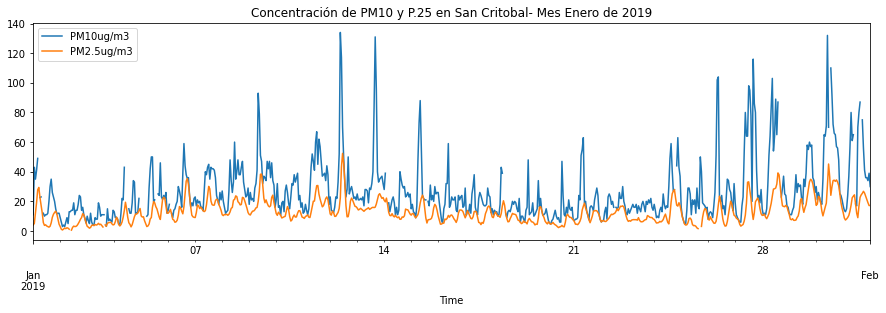

In [26]:
SANCRISTOBALAÑO2019DIA1.plot(title="Concentración de PM10 y P.25 en San Critobal- Mes Enero de 2019",figsize=(15,4))